In [1]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2024-04-03 14:57:47.514408: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-03 14:57:47.536451: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 14:57:47.536472: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 14:57:47.536477: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 14:57:47.540135: I tensorflow/core/platform/cpu_feature_g

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [3]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [4]:
import os
original_dataset_dir = '/home/shidaohg/WorkPlace/data/kagglecatsanddogs/'
base_dir = '/home/shidaohg/WorkPlace/data/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [16]:
from PIL import Image
import os

def check_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif')):
                try:
                    img = Image.open(os.path.join(root, file))
                    img.verify()
                except (IOError, SyntaxError) as e:
                    print(f'Bad file: {os.path.join(root, file)}')

check_images(test_dir)



In [17]:
history = model.fit(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 2s 24ms/step - loss: 0.6294 - acc: 0.6430 - val_loss: 0.6578 - val_acc: 0.6040
Epoch 2/30
100/100 [==============================] - 2s 22ms/step - loss: 0.5941 - acc: 0.6805 - val_loss: 0.5962 - val_acc: 0.6830
Epoch 3/30
100/100 [==============================] - 2s 22ms/step - loss: 0.5687 - acc: 0.7050 - val_loss: 0.6419 - val_acc: 0.6300
Epoch 4/30
100/100 [==============================] - 2s 22ms/step - loss: 0.5505 - acc: 0.7160 - val_loss: 0.5861 - val_acc: 0.6870
Epoch 5/30
100/100 [==============================] - 2s 22ms/step - loss: 0.5288 - acc: 0.7340 - val_loss: 0.5812 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 2s 22ms/step - loss: 0.5032 - acc: 0.7555 - val_loss: 0.5629 - val_acc: 0.7100
Epoch 7/30
100/100 [==============================] - 2s 22ms/step - loss: 0.4878 - acc: 0.7485 - val_loss: 0.5542 - val_acc: 0.7070
Epoch 8/30
100/100 [==============================] - 2s 22ms/step - 

In [18]:
model.save('cats_and_dogs_small_1.h5')

/home/shidaohg/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


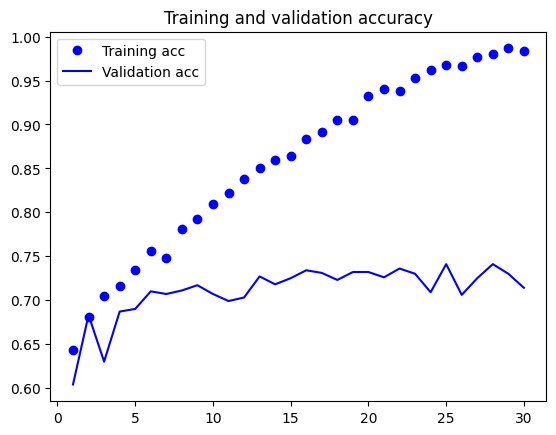

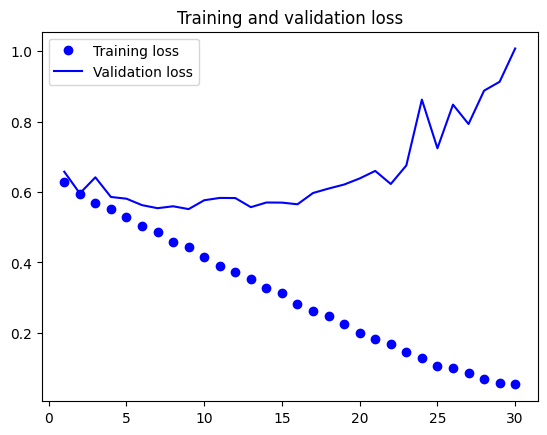

In [19]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

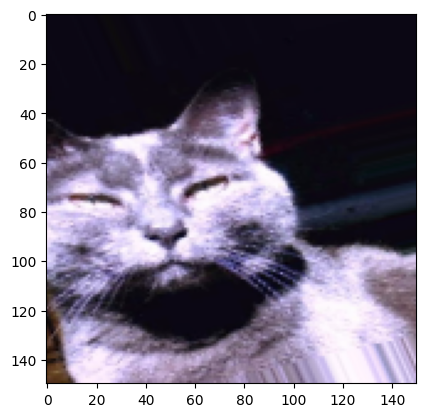

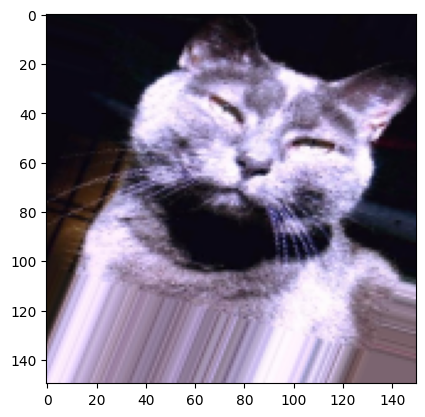

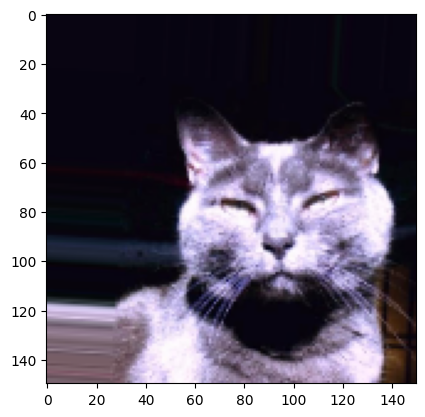

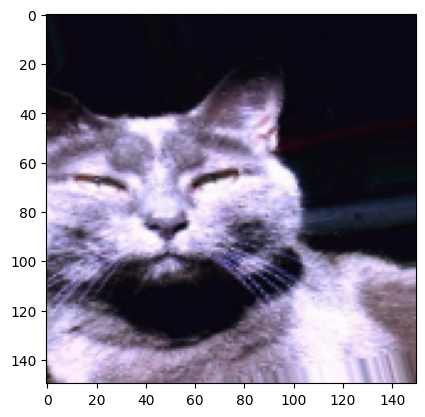

In [21]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [32]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')



Found 2000 images belonging to 2 classes.


AttributeError: 'DirectoryIterator' object has no attribute 'repeat'

In [33]:
history = model.fit(
    train_generator,
    steps_per_epoch=60,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=30)

Epoch 1/100
60/60 [==============================] - 5s 89ms/step - loss: 0.6891 - acc: 0.5415 - val_loss: 0.6865 - val_acc: 0.5031
Epoch 2/100
60/60 [==============================] - 5s 88ms/step - loss: 0.6836 - acc: 0.5536 - val_loss: 0.6864 - val_acc: 0.5396
Epoch 3/100
60/60 [==============================] - 5s 91ms/step - loss: 0.6816 - acc: 0.5683 - val_loss: 0.6763 - val_acc: 0.5406
Epoch 4/100
60/60 [==============================] - 5s 89ms/step - loss: 0.6735 - acc: 0.5809 - val_loss: 0.6570 - val_acc: 0.6021
Epoch 5/100
60/60 [==============================] - 5s 89ms/step - loss: 0.6604 - acc: 0.6108 - val_loss: 0.7016 - val_acc: 0.5281
Epoch 6/100
60/60 [==============================] - 5s 89ms/step - loss: 0.6540 - acc: 0.6066 - val_loss: 0.6477 - val_acc: 0.6240
Epoch 7/100
60/60 [==============================] - 5s 89ms/step - loss: 0.6490 - acc: 0.6203 - val_loss: 0.6470 - val_acc: 0.6208
Epoch 8/100
60/60 [==============================] - 5s 88ms/step - loss: 0.

In [34]:
model.save('cats_and_dogs_small_2.h5')

/home/shidaohg/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


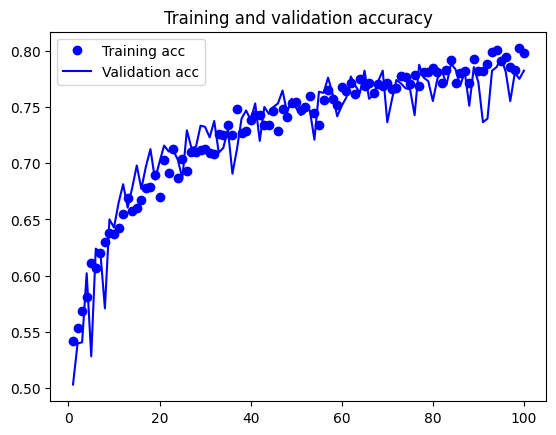

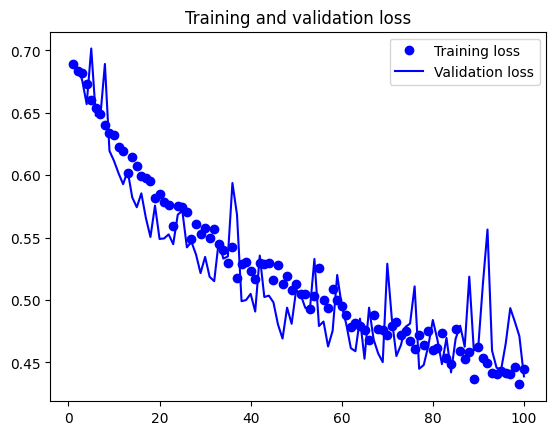

In [35]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()